In [51]:
import pandas as pd
import numpy as np
import nltk
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [62]:
nltk.download('punkt', download_dir='C:/Users/kusha/AppData/Roaming/nltk_data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/kusha/AppData/Roaming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
sentence_lengths_sentiment = []
sentences_as_list = []

for index, row in df.iterrows():
    sentence = row['review']
    sentiment = row['sentiment']
    words = sentence.split()
    sentence_lengths_sentiment.append([len(words), sentiment])
    sentences_as_list.append(sentence)

In [4]:
print(sentence_lengths_sentiment[:5])

[[307, 'positive'], [162, 'positive'], [166, 'positive'], [138, 'negative'], [230, 'positive']]


In [5]:
length_elements = [element[0] for element in sentence_lengths_sentiment]

def plot_sentence_hist(length_elements):
    plt.hist(length_elements, bins=50)
    plt.title("Sentence Lengths")
    plt.xlabel("Number of Words")
    plt.xlim(0, 1500)
    plt.ylabel("Frequency")
    plt.show()

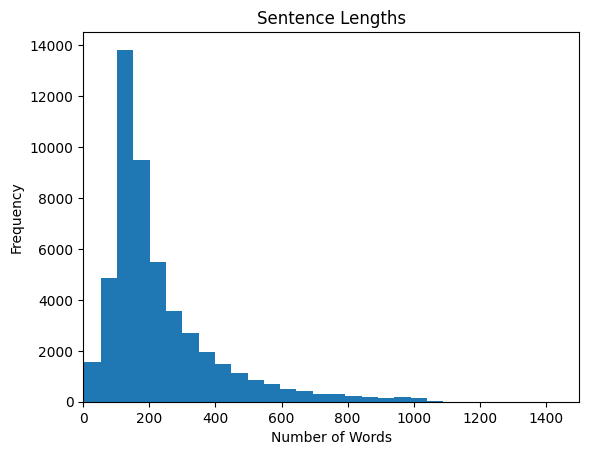

In [6]:
len_of_sentences = plot_sentence_hist(length_elements)
len_of_sentences

In [19]:
def plot_sentence_length_with_labels(sentence_lengths_sentiment, length_elements):
    sentence_labels = [1 if element[1] == "positive" else 0 for element in sentence_lengths_sentiment]
    positives = sentence_labels.count(1)
    negatives = sentence_labels.count(0)
    categories = ['Negative', 'Positive']
    counts = [negatives, positives]

    plt.bar(categories, counts, color=['red', 'green'], alpha=0.7)

    for i, count in enumerate(counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.ylabel('Count')
    plt.title('Positive vs Negative Labels')
    plt.show()

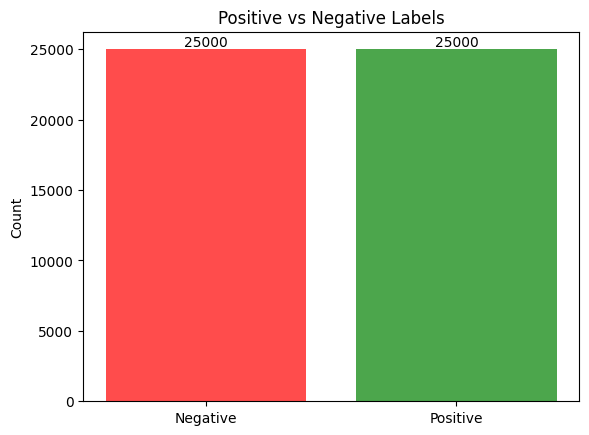

In [21]:
labels_plot = plot_sentence_length_with_labels(sentence_lengths_sentiment, length_elements)
labels_plot

In [59]:
def preprocess_text(text):
    """Full preprocessing pipeline for a single sentence"""
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 5. POS tagging for lemmatization
    pos_tags = pos_tag(filtered_tokens)
    
    # 6. Lemmatization with POS
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, tag in pos_tags:
        wn_tag = get_wordnet_pos(tag)
        lemmatized = lemmatizer.lemmatize(word, wn_tag)
        lemmatized_tokens.append(lemmatized)|
    
    return lemmatized_tokens


SyntaxError: invalid syntax (759180703.py, line 25)

In [63]:
word_tokenize("Hello, how are you doing today?") 

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Kusha/nltk_data'
    - 'c:\\anaconda\\nltk_data'
    - 'c:\\anaconda\\share\\nltk_data'
    - 'c:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Kusha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [53]:
all_words = []
for element in sentences_as_list:
    text_words = word_tokenize(str(element))
    all_words.extend(text_words)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Kusha/nltk_data'
    - 'c:\\anaconda\\nltk_data'
    - 'c:\\anaconda\\share\\nltk_data'
    - 'c:\\anaconda\\lib\\nltk_data'
    - 'C:\\Users\\Kusha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
